In [160]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import pairwise_distances,accuracy_score,confusion_matrix,classification_report
from sklearn import cluster, datasets, preprocessing, metrics
matplotlib.style.use('ggplot') 

## 1. Format the Data

In [91]:
df=pd.read_csv("../../assets/datasets/airport2.csv")

In [92]:
df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33
2,ABQ,2006,392,329,71,124
3,ABQ,2007,366,304,107,45
4,ABQ,2008,333,300,79,42


Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [117]:
names={}
i=0
for name in df['Airport'].unique():
    names[name]=i
    i+=1

In [118]:
df["Airport"]=df["Airport"].apply(lambda x: names[x])

## 2. Plot the data

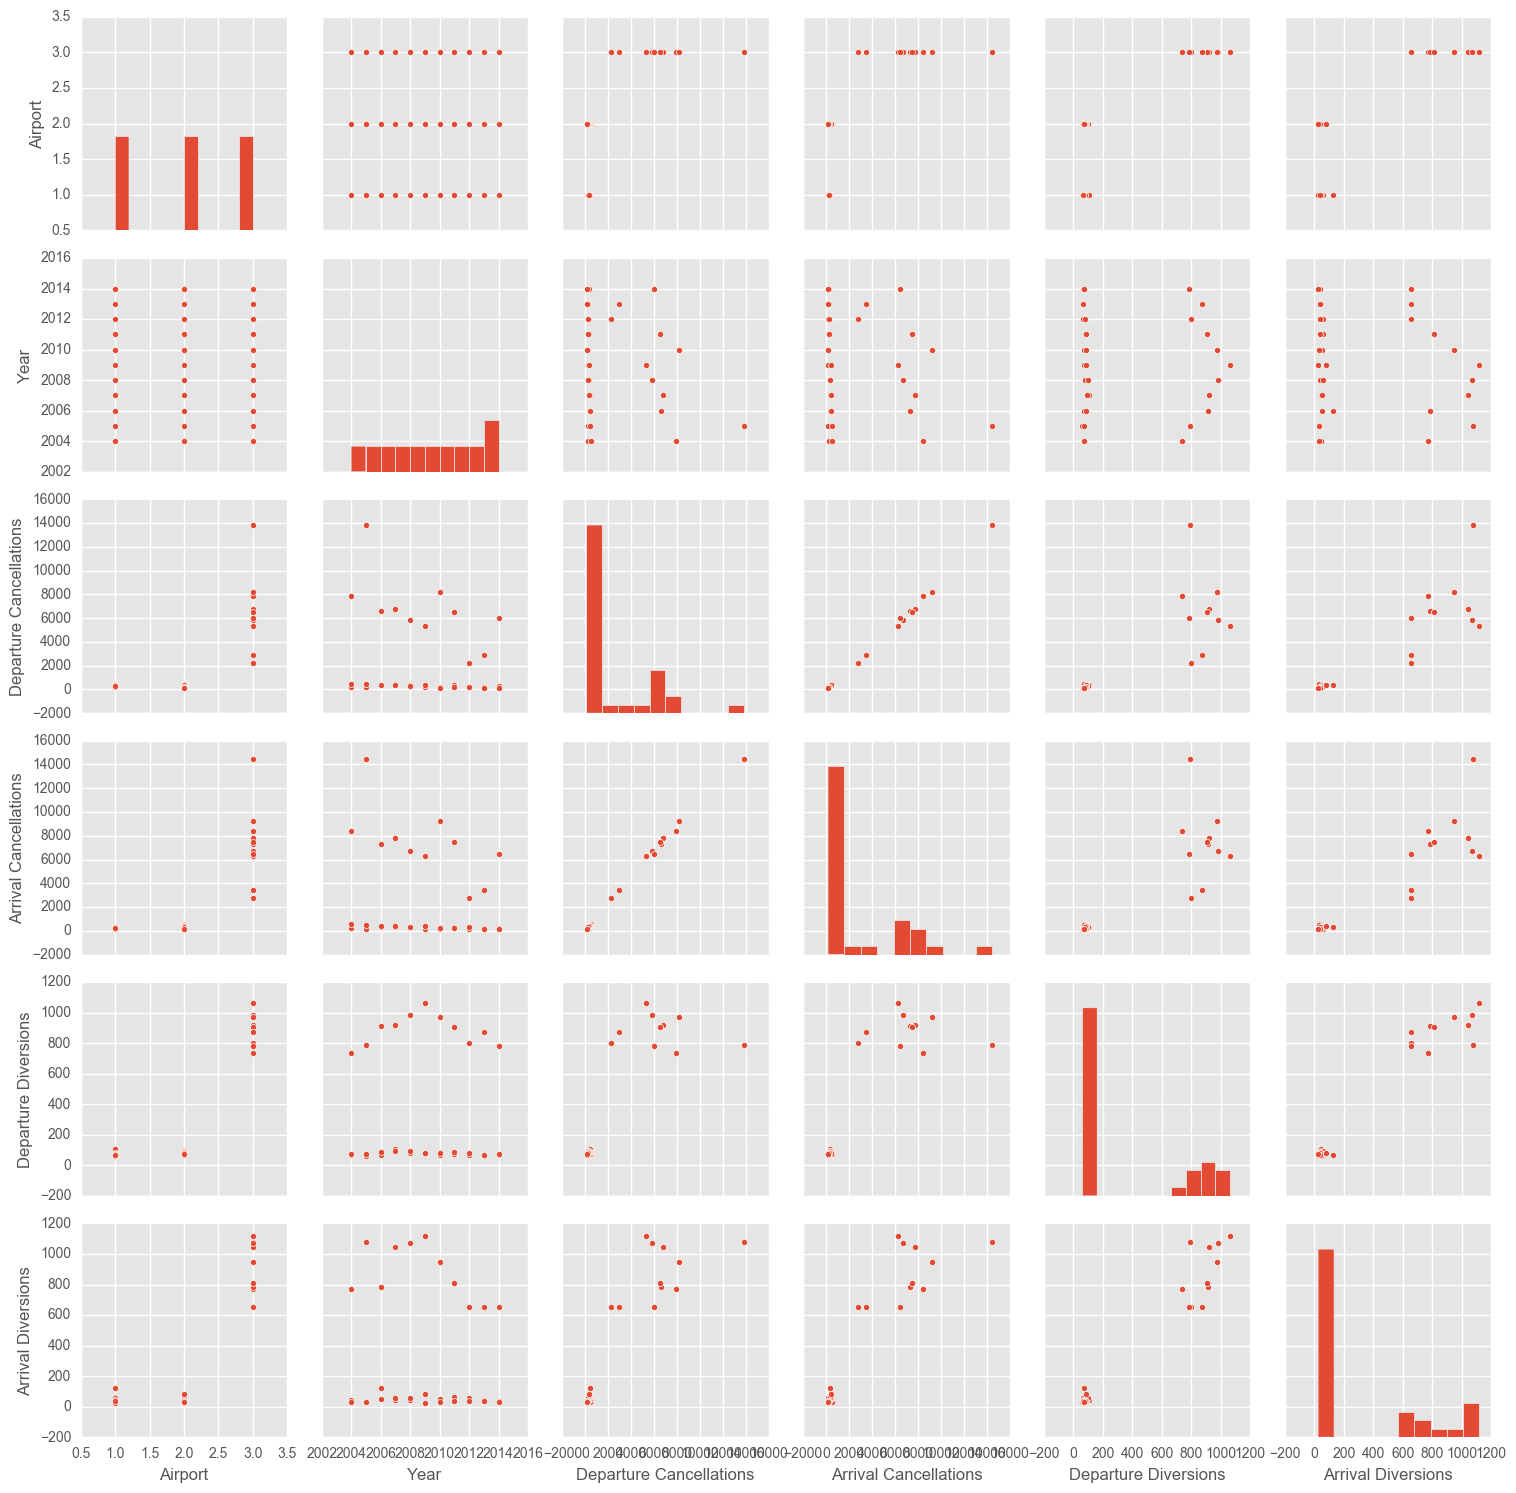

In [14]:
sns.pairplot(df)

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [108]:
df.head(1)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,1,2004,242,235,71,46


In [123]:
cols=["Departure Cancellations","Arrival Cancellations","Departure Diversions","Arrival Diversions"]
y=df["Airport"]
X=df[cols]
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [124]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y)

#### 3.2 Conduct the k-means clustering

In [151]:
kmeans=cluster.KMeans(n_clusters=3)
kmeans.fit(x_train,y_train)
pred=kmeans.predict(x_test)

#### 3.3 Compute the labels and centroids

In [152]:
kmeans.cluster_centers_

array([[ 0.01292523,  0.00977379,  0.01671456,  0.02196438],
       [ 0.48635194,  0.5214881 ,  0.83250249,  0.79342508],
       [ 1.        ,  1.        ,  0.72681954,  0.96697248]])

In [153]:
[2 if x==0 else 0 if x==2 else x for x in kmeans.labels_]

[2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1]

In [154]:
np.array(y_train)

array([0, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1,
       2])

#### 3.4 Format the resulting predicted "y" variables and check the accuracy score, classification report, and confusion matrix

In [156]:
accuracy_score(y_test,pred)

0.33333333333333331

In [157]:
kmeans.score(x_test)

-0.54799825363112786

In [158]:
confusion_matrix(y_test,pred)

array([[3, 0, 0],
       [2, 0, 0],
       [0, 4, 0]])

In [162]:
print classification_report(y_test,pred)

             precision    recall  f1-score   support

          0       0.60      1.00      0.75         3
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         4

avg / total       0.20      0.33      0.25         9



**Question**: What are we understand from this these performance metrics? 

## 4. Extra Trees Classifier

In [163]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
etpred=et.predict(x_test)

In [166]:
print classification_report(y_test,etpred)

             precision    recall  f1-score   support

          0       1.00      0.67      0.80         3
          1       0.67      1.00      0.80         2
          2       1.00      1.00      1.00         4

avg / total       0.93      0.89      0.89         9



In [167]:
confusion_matrix(y_test,etpred)

array([[2, 1, 0],
       [0, 2, 0],
       [0, 0, 4]])

In [168]:
accuracy_score(y_test,etpred)

0.88888888888888884

## 5. KNN Classifier

In [169]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [171]:
print classification_report(y_test,predknn)

             precision    recall  f1-score   support

          0       0.67      0.67      0.67         3
          1       0.50      0.50      0.50         2
          2       1.00      1.00      1.00         4

avg / total       0.78      0.78      0.78         9



In [172]:
confusion_matrix(y_test,predknn)

array([[2, 1, 0],
       [1, 1, 0],
       [0, 0, 4]])

In [173]:
accuracy_score(y_test,predknn)

0.77777777777777779

## 6. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

In [175]:
from scipy.cluster import hierarchy
from scipy.spatial import distance as ssd

In [185]:
links=hierarchy.linkage(x_train,method='average')

#### 6.2 Plot the Denrogram

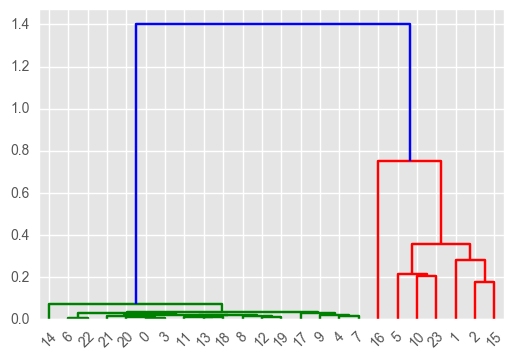

In [186]:
_=hierarchy.dendrogram(links)

## Extra Trees Classifier

## KNN Classifier